# EDA (Analisis Exploratorio de Datos)

In [ ]:
# here we will import the libraries used for machine learning

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import numpy as np
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
from plotnine import * # incluye funciones de ggplot
# Any results you write to the current directory are saved as output.
# dont worry about the error if its not working then insteda of model_selection we can use cross_validation

In [ ]:
data = pd.read_csv(".\data.csv",header=0)

A continuación revisamos la estructura del dataframe y de las variables que contiene

In [72]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.describe()

Contamos los valores perdidos para cada variable

In [ ]:
data.isnull().sum()

En este caso el interés es clasificar correctamente los diagnosticos de una base datos. A continuación visualizamos los diagnosticos.

In [ ]:
a = (data
                       .groupby("diagnosis")
                       .agg(frequency=("diagnosis", "count"))
                       .reset_index())

(ggplot(a) +
  geom_bar(aes(x = "diagnosis", y = "frequency"), stat = 'identity'))


Se puede observar que la mayoría de diagnosticos son de tumores benignos y los malignos se presentan en una menor proporción. A continuación examinamos la distribución de los diagnosticos de acuerdo con otras variables de la base de datos

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,fmt='.0%')

A partir de la matriz de correlacion se observa que hay grupos de variables que se relacionan entre sí. Por ejemplo, las variables radio, perimetro y area tienen una fuerte correlacion entre ellas.

In [ ]:
facet = sns.FacetGrid(data, hue="diagnosis",aspect=4)
facet.map(sns.kdeplot,'radius_mean',shade= True)
facet.set(xlim=(0, data['radius_mean'].max()))
facet.add_legend() 
plt.show()

facet = sns.FacetGrid(data, hue="diagnosis",aspect=4)
facet.map(sns.kdeplot,'texture_mean',shade= True)
facet.set(xlim=(0, data['texture_mean'].max()))
facet.add_legend() 
plt.xlim(10,40)


Los tumores malignos, presentan un radio promedio mayor en comparación con los tumores malignos. Mientras que con respecto a la textura (desviación estándar de los valores de la escala de grises), los tumores malignos también muestran una puntuación promedio más alta, que los tumores benignos.

In [ ]:
cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]

sns.pairplot(data[cols], hue="diagnosis")
plt.show()

De acuerdo con los diagramas de densidad, se aprecia que las variables que mejor permiten diferenciar el tipo de tumor, son el perimetro, el area y el radio, ya que en la variable textura, ambos grupos exhiben un alto solapamiento.

In [ ]:
size = len(data['texture_mean'])

area = np.pi * (15 * np.random.rand( size ))**2
colors = np.random.rand( size )

plt.xlabel("texture mean")
plt.ylabel("radius mean") 
plt.scatter(data['texture_mean'], data['radius_mean'], s=area, c=colors, alpha=0.5)

Componentes principales

A continuación seleccionamos las variables cuantitativas para reducir la dimensionalidad del dataset

In [ ]:
samples=data.iloc[:,2:32] # excluimos la variable de indentificación y la de diagnostico
samples.head(5)

A continuación escalamos las variables

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # el reescalador mixmax

scaler.fit(samples)
samples_scaled = scaler.transform(samples)
print(samples_scaled)

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


Ahora examinamos los valores propios para determinar el numero de componentes que debemos extraer

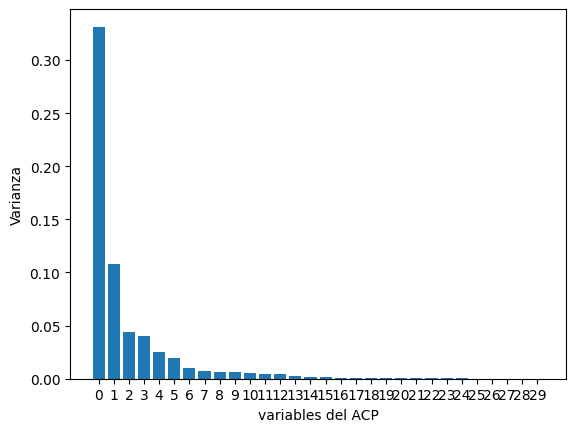

In [54]:
# importar paquetes
from sklearn.decomposition import PCA

# creamos el modelo y ajustamos
model = PCA()
model.fit(samples_scaled)

# crear un rango que enumere las característica del ACP
caract = range(model.n_components_)

# grafiquemos la varianza explicada del modelo ACP
plt.bar(caract,model.explained_variance_)
plt.xticks(caract)
plt.ylabel('Varianza')
plt.xlabel('variables del ACP')
plt.show()

Analizando la varianza explicada por cada componente, parece suficiente extraer cuatro componentes

In [69]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(samples_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC 1', 'PC 2','PC 3','PC 4'])
principalDf

,PC 1,PC 2,PC 3,PC 4
0,1.387021,0.426895,-0.541702,0.048481
1,0.462308,-0.556947,-0.205175,-0.042830
2,0.954621,-0.109701,-0.147848,-0.001070
3,1.000816,1.525089,-0.053271,-0.207917
4,0.626828,-0.302471,-0.409336,0.238812
...,...,...,...,...
564,1.002840,-0.474785,-0.100040,0.272993
565,0.620757,-0.517200,0.400360,0.182443
566,0.226311,-0.287946,0.315224,-0.011745
567,1.677834,0.335946,0.296115,-0.156302


Ya obtuvimos las puntuaciones de cada observación en los cuatro componentes. Ahora procedemos a agregar estas puntuaciones en la BD original.

In [71]:
data_new=pd.concat([data[['diagnosis']],principalDf], axis = 1)
#data_new = pd.concat([samples, principalDf])
data_new.head()

,diagnosis,PC 1,PC 2,PC 3,PC 4
0,M,1.387021,0.426895,-0.541702,0.048481
1,M,0.462308,-0.556947,-0.205175,-0.042830
2,M,0.954621,-0.109701,-0.147848,-0.001070
3,M,1.000816,1.525089,-0.053271,-0.207917
4,M,0.626828,-0.302471,-0.409336,0.238812
